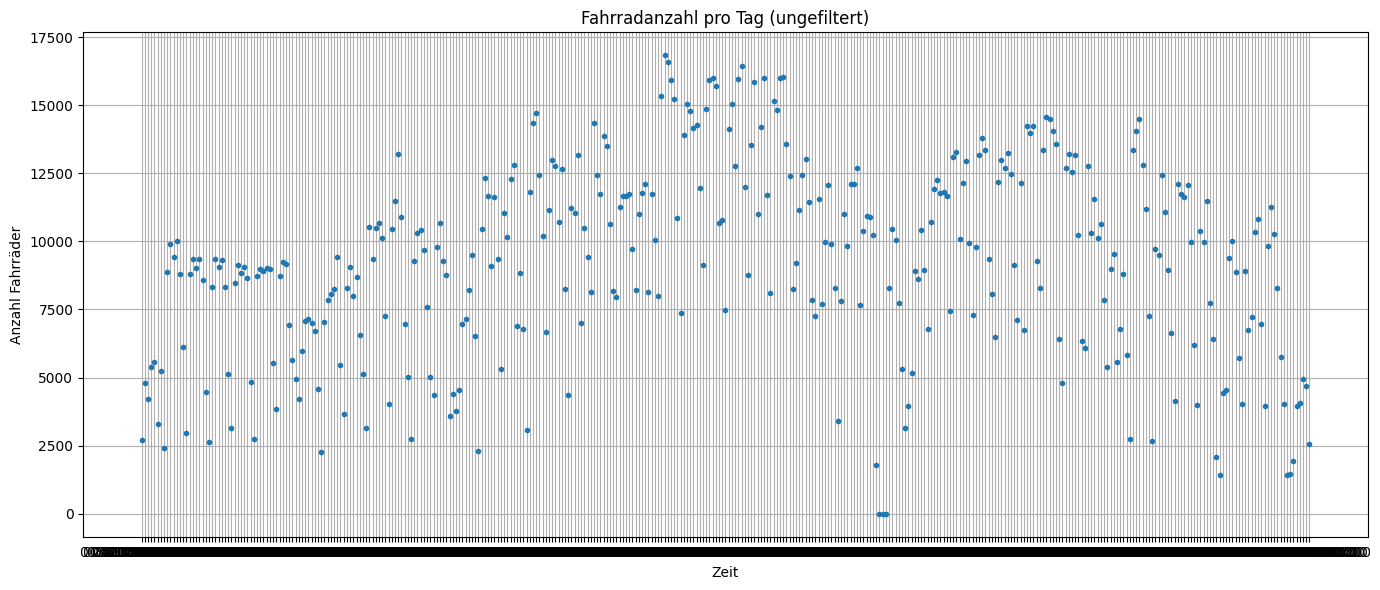

In [60]:
# Basics
import pandas as pd
import matplotlib.pyplot as plt
import csv

def extract_csv_data(file_path, field_name):
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        # print(reader.fieldnames)
        data = [row[field_name] for row in reader if row[field_name]]
    return data

# CSV-Datei laden (ersetze 'daten.csv' durch den tatsächlichen Dateipfad)
csv_file = './data/Fahrraeder_taeglich.csv'
# csv_file = 'data.csv'
raeder = extract_csv_data(csv_file, 'Raeder')
einwaerts = extract_csv_data(csv_file, 'stadteinwaerts')
auswaerts = extract_csv_data(csv_file, 'stadtauswaerts')
temp = extract_csv_data(csv_file, 'GefuehlteTemperatur')
zeit = extract_csv_data(csv_file, 'Zeit', )

zeit_dt = pd.to_datetime(zeit, format='%d.%m.%Y %H:%M')
raeder = [float(x) for x in raeder]
temp = [float(x) for x in temp]
einwaerts = [float(x) for x in einwaerts]
auswaerts = [float(x) for x in auswaerts]

proTag = [r - (e + a) for r, e, a in zip(raeder, einwaerts, auswaerts)]

# Zeitreihe plotten
plt.figure(figsize=(14, 6))
plt.plot(zeit, raeder, marker='o', linestyle='none', markersize=3)
plt.title('Fahrradanzahl pro Tag (ungefiltert)')
plt.xlabel('Zeit')
plt.ylabel('Anzahl Fahrräder')
plt.grid(True)
plt.tight_layout()
plt.show()

Mean: 9198.715068493151
Median: 9339.0
Modalwert: 0
25%-Quantil: 6878.0
75%-Quantil: 11780.0
Standardabweichung: 3583.7611513631273
Varianz: 12843343.990019567


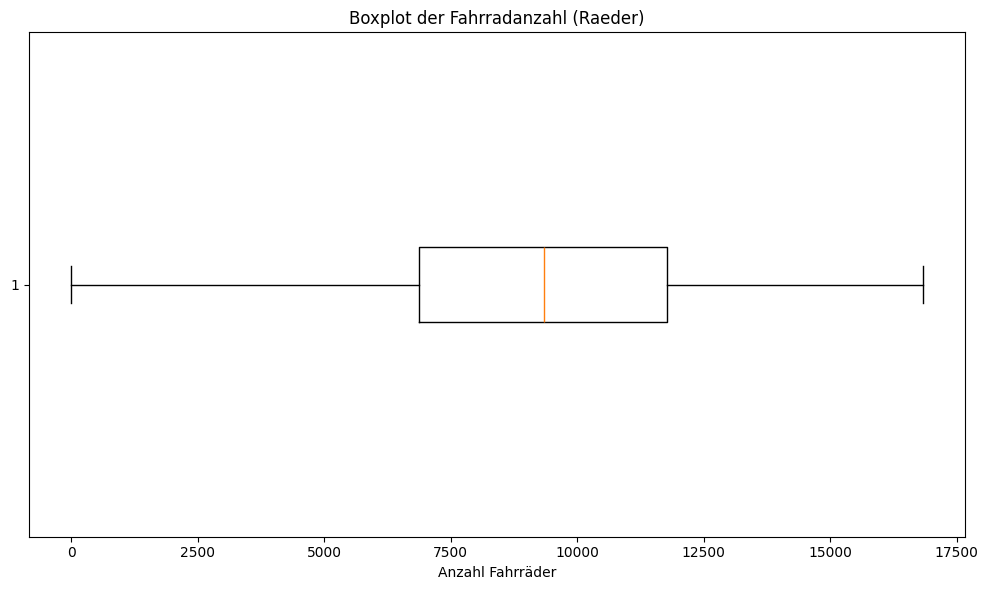

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Statistische Kennwerte berechnen
werte = np.array(raeder, dtype=float)

median = np.median(werte)
mean = np.mean(werte)
modalwert = np.bincount(werte.astype(int)).argmax()
quantile_25 = np.quantile(werte, 0.25)
quantile_75 = np.quantile(werte, 0.75)
standardabweichung = np.std(werte, ddof=1)
varianz = np.var(werte, ddof=1)

# Ausgabe
print("Mean:", mean)
print("Median:", median)
print("Modalwert:", modalwert)
print("25%-Quantil:", quantile_25)
print("75%-Quantil:", quantile_75)
print("Standardabweichung:", standardabweichung)
print("Varianz:", varianz)

plt.figure(figsize=(10, 6))
plt.boxplot(werte, vert=False)
plt.title('Boxplot der Fahrradanzahl (Raeder)')
plt.xlabel('Anzahl Fahrräder')
plt.tight_layout()
plt.show()

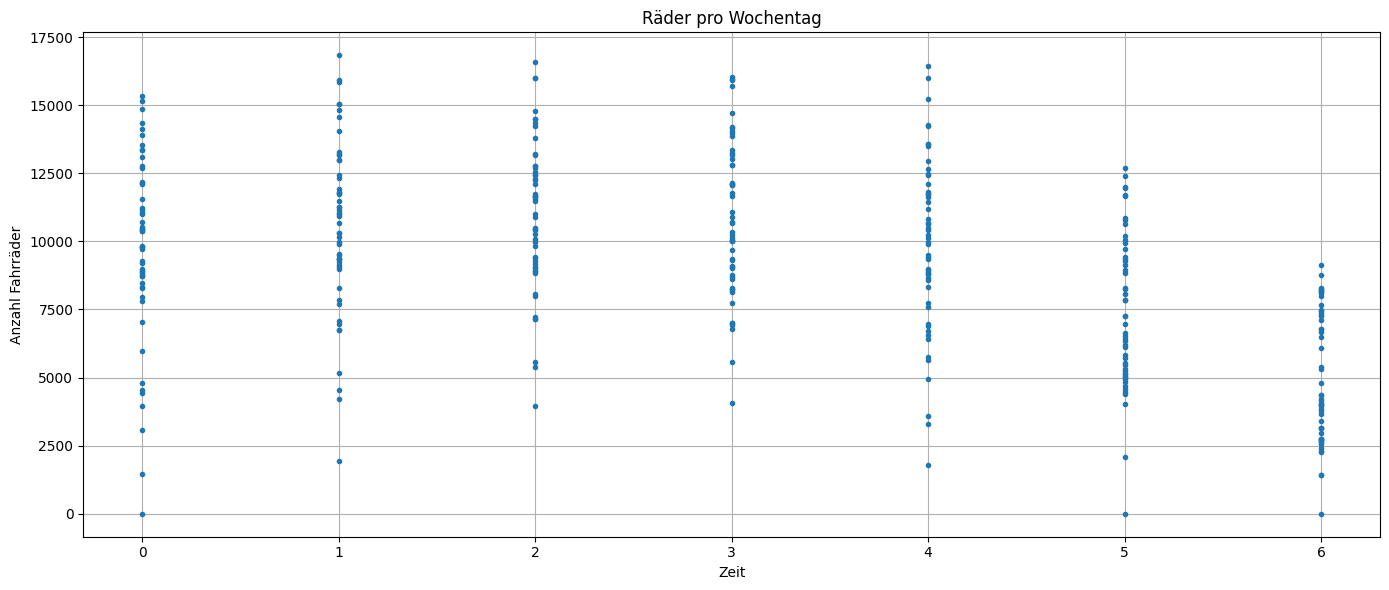

Pearson Correlation between Weekday and Raeder: -0.4373733376799042


In [61]:
from scipy.stats import pearsonr

weekdays = zeit_dt.weekday  # 0=Monday, 1=Tuesday, ..., 6=Sunday

# Calculate Pearson correlation
correlation, _ = pearsonr(weekdays, raeder)

plt.figure(figsize=(14, 6))
plt.plot(weekdays, raeder, marker='o', linestyle='none', markersize=3)
plt.title('Räder pro Wochentag')
plt.xlabel('Zeit')
plt.ylabel('Anzahl Fahrräder')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Pearson Correlation between Weekday and Raeder:", correlation)

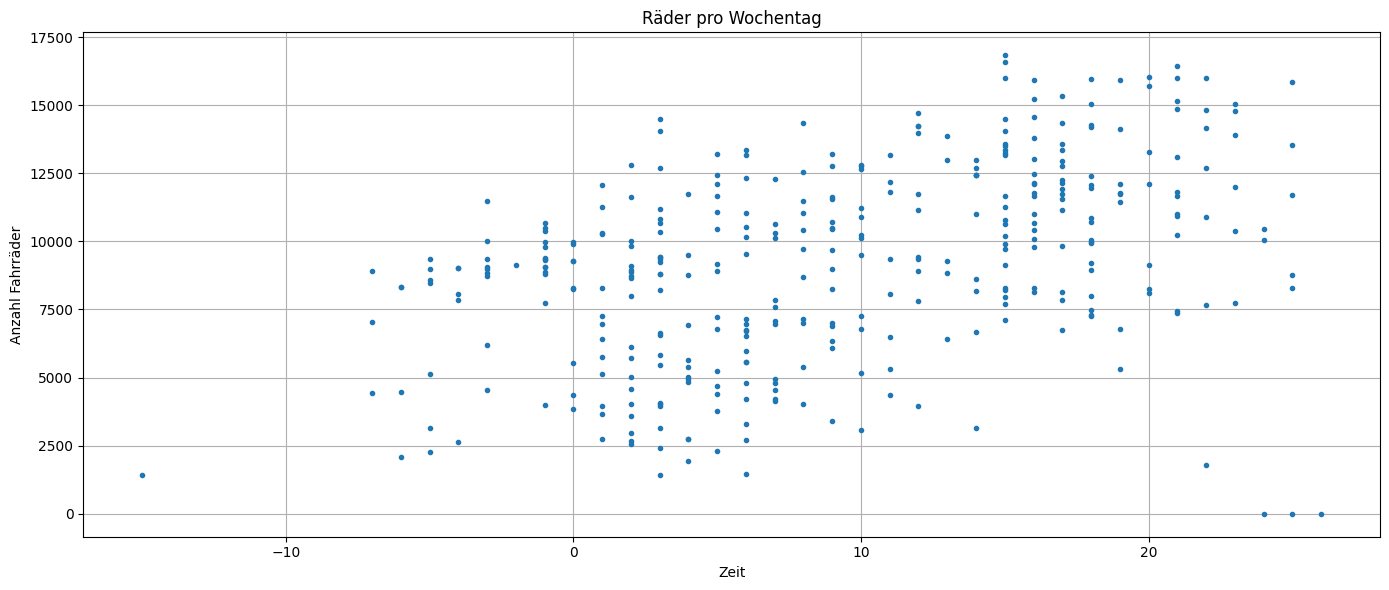

Pearson Correlation between Weekday and Raeder: 0.4258805266190003


In [62]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation, _ = pearsonr(temp, raeder)

plt.figure(figsize=(14, 6))
plt.plot(temp, raeder, marker='o', linestyle='none', markersize=3)
plt.title('Räder pro Wochentag')
plt.xlabel('Zeit')
plt.ylabel('Anzahl Fahrräder')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Pearson Correlation between Weekday and Raeder:", correlation)

Pearson correlation: 0.4258805266190003


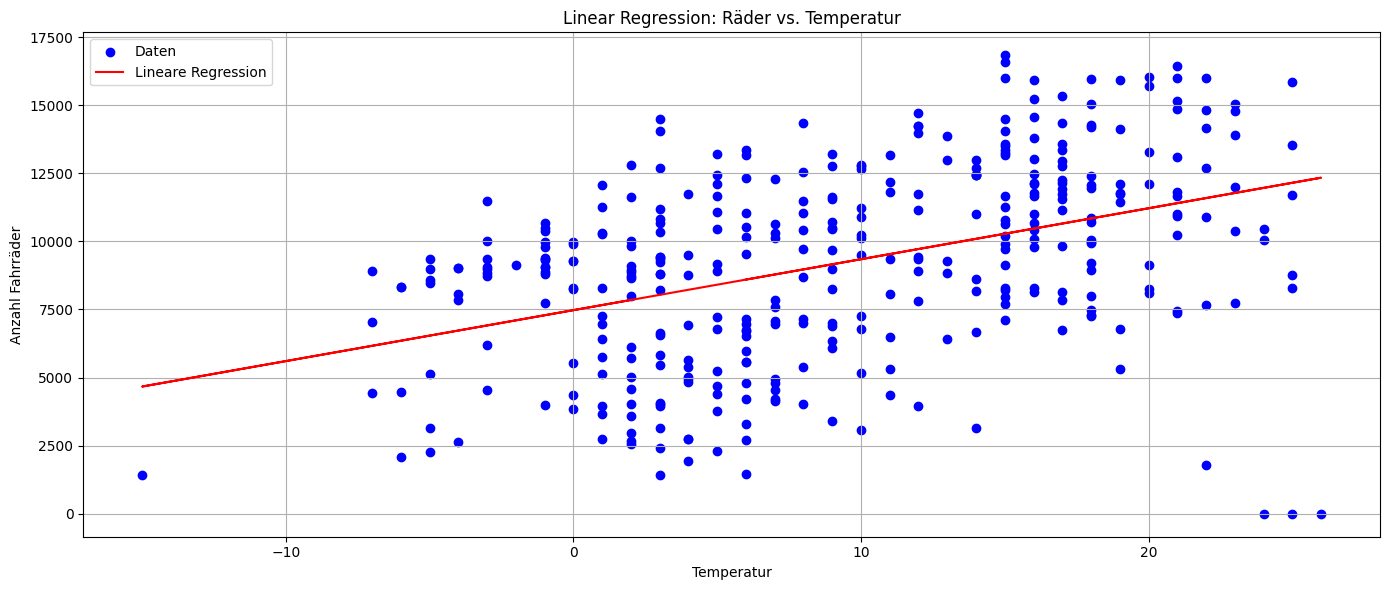

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Example data (replace with actual temp and raeder data)
temp_np = np.array(temp)  # replace with actual data
raeder_np = np.array(raeder)  # replace with actual data

# Calculate Pearson correlation
correlation, _ = pearsonr(temp_np, raeder_np)
print(f"Pearson correlation: {correlation}")

# Linear regression
model = LinearRegression()
model.fit(temp_np.reshape(-1, 1), raeder_np)  # Reshape temp to 2D array

# Predicted values
predictions = model.predict(temp_np.reshape(-1, 1))

# Plot the data and the linear regression line
plt.figure(figsize=(14, 6))
plt.scatter(temp_np, raeder_np, marker='o', color='blue', label='Daten')
plt.plot(temp_np, predictions, color='red', label='Lineare Regression')
plt.title('Linear Regression: Räder vs. Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Anzahl Fahrräder')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()